<a href="https://colab.research.google.com/github/aletrujim/lung-sounds/blob/main/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_FOLDER = "/content/drive/MyDrive/lung sounds/sample_data/"

breath_sound_file_1 = "2021-08-07 12.32.04.wav"
breath_sound_file_2 = "2021-08-09 15.38.46.wav"

breath_1, _ = librosa.load(os.path.join(BASE_FOLDER, breath_sound_file_1))
breath_2, _ = librosa.load(os.path.join(BASE_FOLDER, breath_sound_file_2))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

In [ ]:
ipd.Audio(os.path.join(BASE_FOLDER, breath_sound_file_1))

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


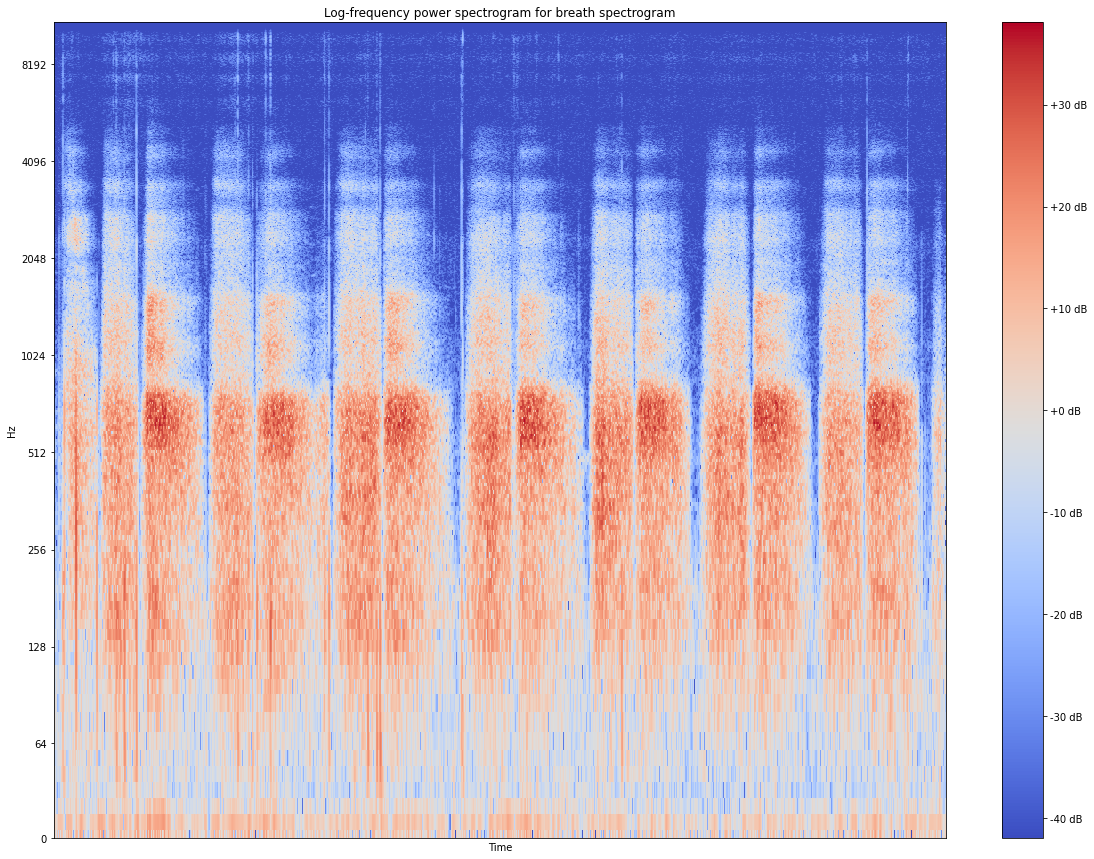

In [ ]:
plot_spectrogram(breath_2, "breath spectrogram")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


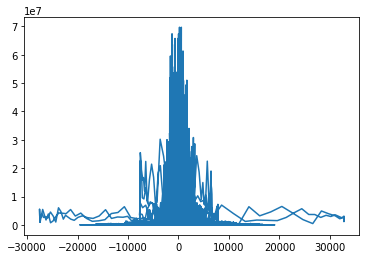

In [ ]:
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = wav.read('/content/drive/MyDrive/lung sounds/sample_data/2021-08-09 15.38.46.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()